In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
dataset = loadmat('face_emotion_data.mat')

X, y = dataset['X'], dataset['y']
n, p = np.shape(X)

#y[y==-1] = 0  # use 0/1 for labels instead of -1/+1
X = np.hstack((np.ones((n,1)), X))  # append a column of ones

In [2]:
lam = 0.5

In [3]:
def KernelClassifier(X1, X2, Y,sigma):
    distsq=np.zeros((X1.shape[0],X1.shape[0]),dtype=float)

    for i in range(0,X1.shape[0]):
        for j in range(0,X2.shape[0]):
            d = np.linalg.norm(X1[i,:]-X2[j,:])
            distsq[i,j]=d**2
        
    K = np.exp(-distsq/(2*sigma**2))
    
    alpha = np.linalg.inv(K+lam*np.identity(X1.shape[0]))@Y

    return (alpha, K)

In [4]:
def ComputeAlpha(K, Y):
    alpha = np.linalg.inv(K+lam*np.identity(K.shape[0]))@Y

    return alpha

In [5]:
def y_labels(X_train, X_test, alpha, sigma):
    y_pred = np.empty((len(X_test), 1))
    for i in range(len(X_test)):
        y_pred[i][0] = np.exp(-np.linalg.norm(X_train - X_test[i,:], axis = 1)**2/(2*sigma**2))@alpha
        
    return y_pred
        

In [6]:
def ComputeKernel(X1, X2,sigma):
    distsq=np.zeros((X1.shape[0],X1.shape[0]),dtype=float)

    for i in range(0,X1.shape[0]):
        for j in range(0,X2.shape[0]):
            d = np.linalg.norm(X1[i,:]-X2[j,:])
            distsq[i,j]=d**2
        
    K = np.exp(-distsq/(2*sigma**2))
    
  

    return K

In [7]:
sigmas = np.linspace(.1, 30.0, 100)
err = []

for sigma in sigmas:
    alpha, K = KernelClassifier(X, X, y, sigma)
    yHat = K @ alpha
    
    err.append(
        np.mean(
            np.sign(yHat)!= y))
    
    

[[-0.66666667]
 [ 0.66666667]
 [-0.66666667]
 [ 0.66666667]
 [ 0.66666667]
 [-0.66666667]
 [ 0.66666667]
 [-0.66666667]
 [ 0.66666667]
 [ 0.66666667]
 [-0.66666667]
 [ 0.66666667]
 [ 0.66666667]
 [ 0.66666667]
 [ 0.66666667]
 [-0.66666667]
 [-0.66666667]
 [-0.66666667]
 [ 0.66666667]
 [-0.66666667]
 [ 0.66666667]
 [-0.66666667]
 [ 0.66666667]
 [-0.66666667]
 [-0.66666667]
 [ 0.66666667]
 [-0.66666667]
 [ 0.66666667]
 [-0.66666667]
 [ 0.66666667]
 [-0.66666667]
 [ 0.66666667]
 [-0.66666667]
 [ 0.66666667]
 [-0.66666667]
 [ 0.66666667]
 [-0.66666667]
 [ 0.66666667]
 [ 0.66666667]
 [ 0.66666667]
 [-0.66666667]
 [ 0.66666667]
 [ 0.66666667]
 [-0.66666667]
 [ 0.66666667]
 [-0.66666667]
 [-0.66666667]
 [ 0.66666667]
 [ 0.66666667]
 [-0.66666667]
 [ 0.66666667]
 [-0.66666667]
 [ 0.66666667]
 [-0.66666667]
 [-0.66666667]
 [ 0.66666667]
 [-0.66666667]
 [ 0.66666667]
 [-0.66666667]
 [ 0.66666667]
 [-0.66666667]
 [ 0.66666667]
 [-0.66666667]
 [-0.66666667]
 [ 0.66666667]
 [-0.66666667]
 [-0.66666

[[-0.61209361]
 [ 0.81119085]
 [-0.6865912 ]
 [ 0.81122881]
 [ 0.92810609]
 [-0.92569572]
 [ 0.75003692]
 [-0.51744997]
 [ 0.76922795]
 [ 0.26798998]
 [-0.75659309]
 [ 0.63990736]
 [ 0.84340814]
 [ 0.92382802]
 [ 0.59600122]
 [-0.57329956]
 [-0.78619922]
 [-0.93655188]
 [ 0.70442984]
 [-0.74050589]
 [ 0.93840074]
 [-0.83359797]
 [ 0.80964704]
 [-0.8496158 ]
 [-1.11143076]
 [ 1.01020028]
 [-0.68595583]
 [ 1.09017351]
 [-1.0885368 ]
 [ 0.8699329 ]
 [-0.7387392 ]
 [ 0.75573028]
 [-0.60243949]
 [ 0.72905007]
 [-1.07435117]
 [ 0.77777644]
 [-0.48513515]
 [ 0.7153931 ]
 [ 0.37201814]
 [ 0.70680406]
 [-0.75843354]
 [ 0.50323915]
 [ 0.81528474]
 [-0.91655903]
 [ 1.00516611]
 [-0.57623396]
 [-0.47086217]
 [ 0.78511447]
 [ 0.96060085]
 [-0.39617665]
 [ 0.65668219]
 [-0.79490033]
 [ 0.93756233]
 [-0.63120533]
 [-0.94877558]
 [ 1.10516588]
 [-0.6653997 ]
 [ 0.96053568]
 [-0.92411384]
 [ 0.65474549]
 [-0.98574913]
 [ 0.10689749]
 [-1.049707  ]
 [-0.94916237]
 [ 1.04944363]
 [-1.11224969]
 [-1.21196

[[-0.48331056]
 [ 0.79574506]
 [-0.49608963]
 [ 0.87307733]
 [ 0.99499198]
 [-0.80417974]
 [ 0.7064653 ]
 [-0.26513823]
 [ 0.68303014]
 [ 0.02097805]
 [-0.73618786]
 [ 0.38045271]
 [ 0.73880578]
 [ 0.89588083]
 [ 0.38029448]
 [-0.50620179]
 [-0.86237927]
 [-1.06699821]
 [ 0.39540256]
 [-0.5078061 ]
 [ 0.87363648]
 [-0.66453145]
 [ 0.73131042]
 [-0.85173548]
 [-1.08859014]
 [ 1.01428471]
 [-0.43728383]
 [ 1.40473268]
 [-0.91810861]
 [ 0.85392878]
 [-0.81216728]
 [ 0.60492687]
 [-0.40665333]
 [ 0.70278593]
 [-1.08796156]
 [ 0.72500836]
 [-0.2257602 ]
 [ 0.87786767]
 [ 0.13103527]
 [ 0.5340106 ]
 [-0.84925743]
 [ 0.13687331]
 [ 0.61471951]
 [-1.05308583]
 [ 0.90854575]
 [-0.25301087]
 [-0.27915906]
 [ 0.7622868 ]
 [ 1.16025451]
 [-0.26819765]
 [ 0.40962557]
 [-0.84271231]
 [ 0.80914605]
 [-0.58070685]
 [-0.75838068]
 [ 1.3058369 ]
 [-0.65855457]
 [ 1.01487332]
 [-1.11005408]
 [ 0.46354932]
 [-0.8783484 ]
 [-0.03817192]
 [-1.09688149]
 [-1.05610286]
 [ 0.93434236]
 [-1.17148733]
 [-1.33591

[[-0.4000626 ]
 [ 0.76562389]
 [-0.44357226]
 [ 0.96082748]
 [ 1.01002393]
 [-0.70658972]
 [ 0.56642536]
 [-0.2206854 ]
 [ 0.56992752]
 [ 0.0371618 ]
 [-0.82725159]
 [ 0.25064282]
 [ 0.64385392]
 [ 0.77294181]
 [ 0.26396491]
 [-0.49594349]
 [-0.87116448]
 [-1.03248907]
 [ 0.30790755]
 [-0.44548714]
 [ 0.92966845]
 [-0.53220896]
 [ 0.71757624]
 [-0.84321689]
 [-0.97403533]
 [ 0.99898652]
 [-0.36714404]
 [ 1.45020437]
 [-0.79951124]
 [ 0.75128985]
 [-0.78978415]
 [ 0.64270568]
 [-0.30179606]
 [ 0.58116658]
 [-1.05867849]
 [ 0.63714741]
 [-0.25918616]
 [ 0.88746381]
 [ 0.14706848]
 [ 0.42903251]
 [-0.85467678]
 [ 0.03979886]
 [ 0.48161126]
 [-1.1352793 ]
 [ 0.82903465]
 [-0.21841151]
 [-0.20721856]
 [ 0.67220843]
 [ 1.26367519]
 [-0.1643016 ]
 [ 0.33896973]
 [-0.83792352]
 [ 0.73717615]
 [-0.67203981]
 [-0.64125011]
 [ 1.27069365]
 [-0.57987526]
 [ 1.01937229]
 [-1.11440265]
 [ 0.39929732]
 [-0.77112838]
 [-0.06465886]
 [-1.04458877]
 [-1.10187316]
 [ 0.82511568]
 [-1.10323985]
 [-1.23802

[[-0.40713028]
 [ 0.82768557]
 [-0.42375744]
 [ 1.0031606 ]
 [ 0.98464696]
 [-0.64934352]
 [ 0.46618599]
 [-0.22216015]
 [ 0.49348053]
 [ 0.01072785]
 [-0.88456143]
 [ 0.1613179 ]
 [ 0.59131947]
 [ 0.69968796]
 [ 0.17543623]
 [-0.53011937]
 [-0.86607158]
 [-0.98613013]
 [ 0.29094557]
 [-0.39681569]
 [ 0.95842747]
 [-0.40373505]
 [ 0.74395814]
 [-0.79796244]
 [-0.86449309]
 [ 0.94656529]
 [-0.3424897 ]
 [ 1.3792347 ]
 [-0.72941118]
 [ 0.65773934]
 [-0.73219922]
 [ 0.69983705]
 [-0.20159306]
 [ 0.46473796]
 [-1.00023164]
 [ 0.55613746]
 [-0.3189617 ]
 [ 0.77520072]
 [ 0.17566808]
 [ 0.36829479]
 [-0.85602886]
 [ 0.00614754]
 [ 0.40316521]
 [-1.12207229]
 [ 0.76289505]
 [-0.21873752]
 [-0.15886407]
 [ 0.74692683]
 [ 1.25429311]
 [-0.08571044]
 [ 0.29167771]
 [-0.80720235]
 [ 0.67643625]
 [-0.69293181]
 [-0.56231022]
 [ 1.19439508]
 [-0.51165272]
 [ 1.08970031]
 [-1.06910525]
 [ 0.34658464]
 [-0.69241129]
 [-0.09358073]
 [-0.98846356]
 [-1.08848019]
 [ 0.74449858]
 [-1.0150358 ]
 [-1.11809

[[-0.39890816]
 [ 0.89124697]
 [-0.39620811]
 [ 1.0003846 ]
 [ 0.94682032]
 [-0.61303564]
 [ 0.40568712]
 [-0.22270096]
 [ 0.44353532]
 [-0.02869277]
 [-0.91364431]
 [ 0.1076229 ]
 [ 0.56013774]
 [ 0.65545119]
 [ 0.11834216]
 [-0.5583045 ]
 [-0.85581052]
 [-0.95127797]
 [ 0.28734903]
 [-0.36016992]
 [ 0.96249302]
 [-0.30622977]
 [ 0.76259766]
 [-0.75665959]
 [-0.78853383]
 [ 0.89762701]
 [-0.33083576]
 [ 1.29907571]
 [-0.68735973]
 [ 0.59202533]
 [-0.68460391]
 [ 0.73425405]
 [-0.12466845]
 [ 0.38912495]
 [-0.94330531]
 [ 0.49995111]
 [-0.34523353]
 [ 0.66763882]
 [ 0.19411468]
 [ 0.33133314]
 [-0.85245161]
 [-0.0072343 ]
 [ 0.36194846]
 [-1.07999105]
 [ 0.71291831]
 [-0.22394607]
 [-0.12635973]
 [ 0.8517499 ]
 [ 1.21744863]
 [-0.03437423]
 [ 0.26002249]
 [-0.77384464]
 [ 0.63052575]
 [-0.67192015]
 [-0.513538  ]
 [ 1.12571721]
 [-0.45616142]
 [ 1.1406958 ]
 [-1.02125394]
 [ 0.30790576]
 [-0.64160557]
 [-0.11341386]
 [-0.94400508]
 [-1.04614318]
 [ 0.68809143]
 [-0.94557475]
 [-1.02827

[[-0.36708921]
 [ 0.94329543]
 [-0.3569615 ]
 [ 0.97919551]
 [ 0.90453311]
 [-0.58262524]
 [ 0.3539705 ]
 [-0.22199412]
 [ 0.39769969]
 [-0.07166072]
 [-0.92625689]
 [ 0.0632284 ]
 [ 0.53236794]
 [ 0.61754289]
 [ 0.0708006 ]
 [-0.5763924 ]
 [-0.839849  ]
 [-0.91799925]
 [ 0.2845044 ]
 [-0.32709549]
 [ 0.9563234 ]
 [-0.21454297]
 [ 0.77384194]
 [-0.71641793]
 [-0.72160597]
 [ 0.84985958]
 [-0.32349075]
 [ 1.21568264]
 [-0.65280629]
 [ 0.53341175]
 [-0.6399385 ]
 [ 0.75844561]
 [-0.05118801]
 [ 0.3270763 ]
 [-0.88505914]
 [ 0.45409467]
 [-0.35491998]
 [ 0.56503199]
 [ 0.2103925 ]
 [ 0.29861446]
 [-0.84399406]
 [-0.01502629]
 [ 0.33357957]
 [-1.02857968]
 [ 0.66707855]
 [-0.23175394]
 [-0.09482824]
 [ 0.94878632]
 [ 1.17184983]
 [ 0.01155913]
 [ 0.23290853]
 [-0.73989977]
 [ 0.58846563]
 [-0.6346188 ]
 [-0.47354126]
 [ 1.05836334]
 [-0.39869431]
 [ 1.17173445]
 [-0.97187797]
 [ 0.27307074]
 [-0.59914135]
 [-0.13256163]
 [-0.90233688]
 [-0.98783695]
 [ 0.63914366]
 [-0.88170524]
 [-0.94626

[[-0.31859296]
 [ 0.97949516]
 [-0.31059614]
 [ 0.94993309]
 [ 0.8634967 ]
 [-0.55670046]
 [ 0.30870487]
 [-0.22015546]
 [ 0.35548121]
 [-0.11359927]
 [-0.92789439]
 [ 0.02575348]
 [ 0.50641895]
 [ 0.58376675]
 [ 0.030791  ]
 [-0.58578897]
 [-0.82060975]
 [-0.88754124]
 [ 0.28081806]
 [-0.2974429 ]
 [ 0.94327723]
 [-0.13128062]
 [ 0.77948297]
 [-0.67833002]
 [-0.66173558]
 [ 0.80501394]
 [-0.31857017]
 [ 1.13497639]
 [-0.62306394]
 [ 0.48169726]
 [-0.59848863]
 [ 0.7734968 ]
 [ 0.01625706]
 [ 0.27627948]
 [-0.8285348 ]
 [ 0.41797207]
 [-0.35314763]
 [ 0.47294205]
 [ 0.22465879]
 [ 0.26923556]
 [-0.83309853]
 [-0.01918334]
 [ 0.31400808]
 [-0.97535125]
 [ 0.62583084]
 [-0.24057541]
 [-0.06412188]
 [ 1.02452241]
 [ 1.12324164]
 [ 0.05254491]
 [ 0.21008462]
 [-0.70765589]
 [ 0.55057247]
 [-0.59011647]
 [-0.43945771]
 [ 0.99508201]
 [-0.34150246]
 [ 1.1844452 ]
 [-0.92375987]
 [ 0.24276352]
 [-0.56285788]
 [-0.15111278]
 [-0.8644427 ]
 [-0.92192031]
 [ 0.5970943 ]
 [-0.82360028]
 [-0.87151

[[-0.26181139]
 [ 1.00136232]
 [-0.26155622]
 [ 0.91823915]
 [ 0.82580769]
 [-0.53400875]
 [ 0.26885525]
 [-0.21757124]
 [ 0.31689506]
 [-0.15240496]
 [-0.92313252]
 [-0.00616045]
 [ 0.48170553]
 [ 0.55281634]
 [-0.00338972]
 [-0.58945027]
 [-0.7999055 ]
 [-0.85987056]
 [ 0.27588532]
 [-0.27076691]
 [ 0.92555475]
 [-0.0579703 ]
 [ 0.78117207]
 [-0.64233474]
 [-0.60767009]
 [ 0.76345153]
 [-0.314629  ]
 [ 1.05931735]
 [-0.59637769]
 [ 0.43643086]
 [-0.55992744]
 [ 0.78092152]
 [ 0.07600063]
 [ 0.23492908]
 [-0.7747954 ]
 [ 0.38989842]
 [-0.34383855]
 [ 0.3929152 ]
 [ 0.236724  ]
 [ 0.24300415]
 [-0.8209399 ]
 [-0.02067727]
 [ 0.30029047]
 [-0.92313219]
 [ 0.58893298]
 [-0.24889941]
 [-0.03505093]
 [ 1.0780488 ]
 [ 1.07433209]
 [ 0.08834959]
 [ 0.19112779]
 [-0.67725871]
 [ 0.51659552]
 [-0.54337889]
 [-0.40945049]
 [ 0.93675108]
 [-0.28678889]
 [ 1.18329613]
 [-0.87762606]
 [ 0.21703992]
 [-0.53096035]
 [-0.16812574]
 [-0.82980715]
 [-0.85387762]
 [ 0.56096163]
 [-0.7706759 ]
 [-0.80335

[[-0.20293038]
 [ 1.01174067]
 [-0.21298472]
 [ 0.88679768]
 [ 0.7918643 ]
 [-0.51358233]
 [ 0.23367811]
 [-0.21461869]
 [ 0.28185205]
 [-0.18699124]
 [-0.91440758]
 [-0.0334415 ]
 [ 0.45798025]
 [ 0.52385942]
 [-0.03294242]
 [-0.58946444]
 [-0.77866231]
 [-0.8342336 ]
 [ 0.26967843]
 [-0.24668628]
 [ 0.90472609]
 [ 0.00508829]
 [ 0.7799039 ]
 [-0.6081759 ]
 [-0.55868362]
 [ 0.72506752]
 [-0.31077833]
 [ 0.98951577]
 [-0.57168149]
 [ 0.39693908]
 [-0.52394547]
 [ 0.78223429]
 [ 0.12752194]
 [ 0.20153429]
 [-0.72415263]
 [ 0.36811528]
 [-0.32970389]
 [ 0.32485994]
 [ 0.24648802]
 [ 0.21971785]
 [-0.80767015]
 [-0.02017674]
 [ 0.29042992]
 [-0.87286682]
 [ 0.55592954]
 [-0.25571028]
 [-0.00831002]
 [ 1.11250283]
 [ 1.02653582]
 [ 0.11892135]
 [ 0.17551368]
 [-0.64831627]
 [ 0.48607659]
 [-0.49709532]
 [-0.38245319]
 [ 0.88344662]
 [-0.23596004]
 [ 1.17237467]
 [-0.83359999]
 [ 0.19551465]
 [-0.502192  ]
 [-0.18275941]
 [-0.79752841]
 [-0.78701297]
 [ 0.52973167]
 [-0.72234636]
 [-0.74124

[[-0.13199545]
 [ 1.01257188]
 [-0.15577697]
 [ 0.84950864]
 [ 0.75430161]
 [-0.49020644]
 [ 0.19539001]
 [-0.21073022]
 [ 0.24278106]
 [-0.22358556]
 [-0.899603  ]
 [-0.06200419]
 [ 0.42960741]
 [ 0.48977651]
 [-0.06448404]
 [-0.58606619]
 [-0.7519198 ]
 [-0.80384937]
 [ 0.26038281]
 [-0.219775  ]
 [ 0.87598953]
 [ 0.0702684 ]
 [ 0.77508866]
 [-0.56777064]
 [-0.503846  ]
 [ 0.68114948]
 [-0.3053928 ]
 [ 0.91058733]
 [-0.54269859]
 [ 0.35458496]
 [-0.48227094]
 [ 0.77722448]
 [ 0.18073265]
 [ 0.16901945]
 [-0.66525495]
 [ 0.34746898]
 [-0.30802002]
 [ 0.25526241]
 [ 0.25553618]
 [ 0.19435796]
 [-0.78931324]
 [-0.01754521]
 [ 0.28156439]
 [-0.81319456]
 [ 0.51942753]
 [-0.26136625]
 [ 0.02129839]
 [ 1.13449799]
 [ 0.96941637]
 [ 0.15012814]
 [ 0.15989905]
 [-0.61365387]
 [ 0.4520685 ]
 [-0.44199228]
 [-0.35200996]
 [ 0.82344952]
 [-0.17887925]
 [ 1.14961441]
 [-0.78151107]
 [ 0.17364777]
 [-0.46942085]
 [-0.19708076]
 [-0.75938796]
 [-0.70780285]
 [ 0.49622402]
 [-0.66763645]
 [-0.67137

[[-0.06741318]
 [ 1.00364039]
 [-0.10416569]
 [ 0.8149969 ]
 [ 0.72129642]
 [-0.46842932]
 [ 0.16258704]
 [-0.20673313]
 [ 0.20861659]
 [-0.25275353]
 [-0.88141698]
 [-0.08525419]
 [ 0.40270631]
 [ 0.45769597]
 [-0.09081542]
 [-0.57986868]
 [-0.72519855]
 [-0.77432079]
 [ 0.24985251]
 [-0.19594602]
 [ 0.84560332]
 [ 0.1219538 ]
 [ 0.76740438]
 [-0.5297208 ]
 [-0.45535878]
 [ 0.64121133]
 [-0.29902889]
 [ 0.840365  ]
 [-0.51523759]
 [ 0.31879189]
 [-0.44398399]
 [ 0.76665212]
 [ 0.22268301]
 [ 0.14473215]
 [-0.61110848]
 [ 0.33203825]
 [-0.28407152]
 [ 0.20058343]
 [ 0.26138387]
 [ 0.17267078]
 [-0.76887374]
 [-0.01343379]
 [ 0.27505564]
 [-0.75712713]
 [ 0.48741836]
 [-0.26368544]
 [ 0.04654687]
 [ 1.13901562]
 [ 0.91573573]
 [ 0.1743274 ]
 [ 0.14776873]
 [-0.5803264 ]
 [ 0.42192248]
 [-0.39111586]
 [-0.3245599 ]
 [ 0.77005049]
 [-0.1292013 ]
 [ 1.12050435]
 [-0.73261937]
 [ 0.15633552]
 [-0.43932113]
 [-0.20692975]
 [-0.72290454]
 [-0.63492623]
 [ 0.46753419]
 [-0.61847672]
 [-0.60929

[[-0.02132181]
 [ 0.99144674]
 [-0.06736269]
 [ 0.78931887]
 [ 0.69754014]
 [-0.45180001]
 [ 0.13981291]
 [-0.20343346]
 [ 0.18454663]
 [-0.27105608]
 [-0.86486416]
 [-0.10050623]
 [ 0.38231987]
 [ 0.43341022]
 [-0.10851629]
 [-0.57326624]
 [-0.70389399]
 [-0.75092457]
 [ 0.24090069]
 [-0.17881161]
 [ 0.82076836]
 [ 0.15495756]
 [ 0.75954904]
 [-0.50090099]
 [-0.42062784]
 [ 0.61178005]
 [-0.29318228]
 [ 0.78988022]
 [-0.49415128]
 [ 0.29411736]
 [-0.41561932]
 [ 0.75521409]
 [ 0.24918277]
 [ 0.12998096]
 [-0.57104141]
 [ 0.32231545]
 [-0.26433705]
 [ 0.1658461 ]
 [ 0.2640593 ]
 [ 0.15763295]
 [-0.75111427]
 [-0.00949128]
 [ 0.27085843]
 [-0.71484476]
 [ 0.46455221]
 [-0.2633096 ]
 [ 0.06375674]
 [ 1.13339542]
 [ 0.87535904]
 [ 0.18931866]
 [ 0.14005239]
 [-0.55452812]
 [ 0.4001622 ]
 [-0.35376288]
 [-0.30442285]
 [ 0.73149392]
 [-0.09456173]
 [ 1.09444364]
 [-0.69573691]
 [ 0.14510373]
 [-0.41678592]
 [-0.21183967]
 [-0.69462565]
 [-0.58151854]
 [ 0.44730528]
 [-0.58264442]
 [-0.56462

[[ 0.01965501]
 [ 0.97596387]
 [-0.03455295]
 [ 0.76515964]
 [ 0.67567269]
 [-0.43569668]
 [ 0.11978783]
 [-0.19999435]
 [ 0.16314417]
 [-0.28529872]
 [-0.84682418]
 [-0.11311735]
 [ 0.362999  ]
 [ 0.41036165]
 [-0.12348781]
 [-0.56539441]
 [-0.68268067]
 [-0.72759942]
 [ 0.23174793]
 [-0.16318121]
 [ 0.79584202]
 [ 0.18165766]
 [ 0.75039677]
 [-0.47347959]
 [-0.38910184]
 [ 0.58434686]
 [-0.28670552]
 [ 0.74394198]
 [-0.4737606 ]
 [ 0.27243327]
 [-0.38913195]
 [ 0.74179123]
 [ 0.27029022]
 [ 0.11852879]
 [-0.53369591]
 [ 0.31423467]
 [-0.24466985]
 [ 0.13775942]
 [ 0.26522371]
 [ 0.14440348]
 [-0.73228024]
 [-0.00522114]
 [ 0.26719154]
 [-0.67479806]
 [ 0.44377416]
 [-0.2612017 ]
 [ 0.07853347]
 [ 1.12166907]
 [ 0.83722274]
 [ 0.20099902]
 [ 0.13374781]
 [-0.52948757]
 [ 0.38022154]
 [-0.31939529]
 [-0.2857018 ]
 [ 0.6961812 ]
 [-0.06410811]
 [ 1.06690122]
 [-0.66076359]
 [ 0.13574785]
 [-0.39543122]
 [-0.21443077]
 [-0.66706273]
 [-0.53240725]
 [ 0.42902553]
 [-0.54955299]
 [-0.52392

[[ 5.56783169e-02]
 [ 9.58026742e-01]
 [-5.56369443e-03]
 [ 7.42311600e-01]
 [ 6.55336814e-01]
 [-4.20020934e-01]
 [ 1.02240545e-01]
 [-1.96372274e-01]
 [ 1.44193413e-01]
 [-2.95914790e-01]
 [-8.27550145e-01]
 [-1.23365036e-01]
 [ 3.44776833e-01]
 [ 3.88572125e-01]
 [-1.35954016e-01]
 [-5.56396359e-01]
 [-6.61585327e-01]
 [-7.04326247e-01]
 [ 2.22597557e-01]
 [-1.48884636e-01]
 [ 7.71072061e-01]
 [ 2.02997413e-01]
 [ 7.40117804e-01]
 [-4.47421683e-01]
 [-3.60434478e-01]
 [ 5.58724955e-01]
 [-2.79671350e-01]
 [ 7.02089678e-01]
 [-4.54022812e-01]
 [ 2.53329008e-01]
 [-3.64399586e-01]
 [ 7.26876011e-01]
 [ 2.86772818e-01]
 [ 1.09717151e-01]
 [-4.98908074e-01]
 [ 3.07326382e-01]
 [-2.25429552e-01]
 [ 1.15206731e-01]
 [ 2.65117821e-01]
 [ 1.32779553e-01]
 [-7.12575929e-01]
 [-7.96332108e-04]
 [ 2.63829175e-01]
 [-6.36925225e-01]
 [ 4.24809429e-01]
 [-2.57623069e-01]
 [ 9.11172442e-02]
 [ 1.10532846e+00]
 [ 8.01239392e-01]
 [ 2.09865263e-01]
 [ 1.28585070e-01]
 [-5.05222194e-01]
 [ 3.6189600

[[ 0.08705795]
 [ 0.93828599]
 [ 0.01986521]
 [ 0.7205827 ]
 [ 0.63624364]
 [-0.40471501]
 [ 0.08692518]
 [-0.19253553]
 [ 0.12748121]
 [-0.30334292]
 [-0.80728171]
 [-0.1315045 ]
 [ 0.32766455]
 [ 0.36805495]
 [-0.14613314]
 [-0.54640497]
 [-0.64064032]
 [-0.68113911]
 [ 0.21360846]
 [-0.13577305]
 [ 0.74664044]
 [ 0.21981626]
 [ 0.72886537]
 [-0.4226898 ]
 [-0.33430928]
 [ 0.53475522]
 [-0.27216587]
 [ 0.66389504]
 [-0.43491455]
 [ 0.23645626]
 [-0.34130324]
 [ 0.71087122]
 [ 0.2993264 ]
 [ 0.10300129]
 [-0.46651249]
 [ 0.3012413 ]
 [-0.20685841]
 [ 0.09721696]
 [ 0.26396296]
 [ 0.12258009]
 [-0.69221374]
 [ 0.00365542]
 [ 0.2606184 ]
 [-0.60115353]
 [ 0.40742282]
 [-0.2528306 ]
 [ 0.10175236]
 [ 1.08554313]
 [ 0.76730145]
 [ 0.21636647]
 [ 0.12434153]
 [-0.48175658]
 [ 0.34501563]
 [-0.25914373]
 [-0.251927  ]
 [ 0.63382512]
 [-0.01423219]
 [ 1.00969158]
 [-0.59622139]
 [ 0.12137038]
 [-0.35582967]
 [-0.2139461 ]
 [-0.61404454]
 [-0.44622425]
 [ 0.39704411]
 [-0.49043399]
 [-0.45279

[[ 0.12033433]
 [ 0.91184499]
 [ 0.04710407]
 [ 0.69475082]
 [ 0.61378418]
 [-0.38605735]
 [ 0.07057815]
 [-0.18741293]
 [ 0.1094249 ]
 [-0.30878232]
 [-0.78088718]
 [-0.13907194]
 [ 0.30781916]
 [ 0.34419277]
 [-0.1559662 ]
 [-0.53271577]
 [-0.61472758]
 [-0.65237033]
 [ 0.20277487]
 [-0.12085438]
 [ 0.71677666]
 [ 0.23558632]
 [ 0.71364813]
 [-0.39357544]
 [-0.30479783]
 [ 0.5069093 ]
 [-0.26225703]
 [ 0.62070697]
 [-0.41189497]
 [ 0.21805695]
 [-0.31455943]
 [ 0.68982957]
 [ 0.31042406]
 [ 0.09688344]
 [-0.4291351 ]
 [ 0.29440912]
 [-0.18481713]
 [ 0.07989992]
 [ 0.2613418 ]
 [ 0.11158957]
 [-0.66614412]
 [ 0.00912042]
 [ 0.25666761]
 [-0.55926911]
 [ 0.38760678]
 [-0.24549197]
 [ 0.1126609 ]
 [ 1.05735043]
 [ 0.72758058]
 [ 0.22176414]
 [ 0.12005554]
 [-0.45358322]
 [ 0.32573035]
 [-0.22672867]
 [-0.23296718]
 [ 0.59956904]
 [ 0.01056815]
 [ 0.97359236]
 [-0.55929106]
 [ 0.11460652]
 [-0.33297715]
 [-0.21067636]
 [-0.58238842]
 [-0.39971665]
 [ 0.37949023]
 [-0.45756494]
 [-0.41428

[[ 0.15258322]
 [ 0.87852627]
 [ 0.07392369]
 [ 0.66538591]
 [ 0.58847584]
 [-0.36433693]
 [ 0.05454046]
 [-0.18078584]
 [ 0.09141244]
 [-0.3106497 ]
 [-0.74817778]
 [-0.14488057]
 [ 0.28619456]
 [ 0.31811695]
 [-0.16405752]
 [-0.51485394]
 [-0.58413071]
 [-0.61834911]
 [ 0.1905589 ]
 [-0.10482939]
 [ 0.6821639 ]
 [ 0.24836361]
 [ 0.69404309]
 [-0.36115713]
 [-0.27336677]
 [ 0.47629861]
 [-0.24981299]
 [ 0.57469094]
 [-0.38552164]
 [ 0.19929983]
 [-0.28530855]
 [ 0.66372301]
 [ 0.31833854]
 [ 0.09199891]
 [-0.38845426]
 [ 0.28690448]
 [-0.16029634]
 [ 0.0649924 ]
 [ 0.25689491]
 [ 0.10061948]
 [-0.63441997]
 [ 0.01538019]
 [ 0.25187071]
 [-0.5129299 ]
 [ 0.36621921]
 [-0.23523414]
 [ 0.12279785]
 [ 1.02021722]
 [ 0.68358392]
 [ 0.22508731]
 [ 0.11604324]
 [-0.42151202]
 [ 0.30494165]
 [-0.1925182 ]
 [-0.21209498]
 [ 0.56243986]
 [ 0.0350021 ]
 [ 0.9307281 ]
 [-0.51814783]
 [ 0.1081459 ]
 [-0.3073166 ]
 [-0.20458864]
 [-0.54598443]
 [-0.3504294 ]
 [ 0.36036225]
 [-0.42161344]
 [-0.37314

[[ 0.1739542 ]
 [ 0.85011116]
 [ 0.09206955]
 [ 0.6420757 ]
 [ 0.56849441]
 [-0.34679551]
 [ 0.04373882]
 [-0.17489274]
 [ 0.0790367 ]
 [-0.30908863]
 [-0.72045866]
 [-0.1474351 ]
 [ 0.26989893]
 [ 0.29842851]
 [-0.16815682]
 [-0.49905033]
 [-0.55914232]
 [-0.59057693]
 [ 0.1811288 ]
 [-0.09283122]
 [ 0.6544746 ]
 [ 0.25501852]
 [ 0.67687081]
 [-0.33612351]
 [-0.25001723]
 [ 0.4528972 ]
 [-0.23915812]
 [ 0.54052019]
 [-0.36457212]
 [ 0.18597938]
 [-0.26307248]
 [ 0.64170915]
 [ 0.32141471]
 [ 0.08938107]
 [-0.35769703]
 [ 0.28097584]
 [-0.14153742]
 [ 0.05626337]
 [ 0.25241458]
 [ 0.09304843]
 [-0.60796506]
 [ 0.02026806]
 [ 0.24776217]
 [-0.47736918]
 [ 0.3500864 ]
 [-0.22586451]
 [ 0.12920949]
 [ 0.98770117]
 [ 0.64972792]
 [ 0.22584471]
 [ 0.11339561]
 [-0.39624433]
 [ 0.28934643]
 [-0.16747531]
 [-0.19609661]
 [ 0.53436189]
 [ 0.05162491]
 [ 0.89574863]
 [-0.48631151]
 [ 0.10383472]
 [-0.28731047]
 [-0.19819472]
 [-0.51701102]
 [-0.31415869]
 [ 0.34577249]
 [-0.3941961 ]
 [-0.34250

[[ 0.19107601]
 [ 0.8215662 ]
 [ 0.10696489]
 [ 0.61969861]
 [ 0.54936442]
 [-0.3297759 ]
 [ 0.03492781]
 [-0.16870924]
 [ 0.06871814]
 [-0.30528922]
 [-0.69263024]
 [-0.14826703]
 [ 0.25506159]
 [ 0.28048633]
 [-0.17022824]
 [-0.48264604]
 [-0.53469695]
 [-0.56345944]
 [ 0.17241492]
 [-0.08190768]
 [ 0.6279075 ]
 [ 0.25886423]
 [ 0.65917686]
 [-0.31277962]
 [-0.22889025]
 [ 0.43123013]
 [-0.22838305]
 [ 0.50963343]
 [-0.34454434]
 [ 0.17441851]
 [-0.24259206]
 [ 0.61977305]
 [ 0.32201607]
 [ 0.08768502]
 [-0.32951792]
 [ 0.27520532]
 [-0.12428833]
 [ 0.0500517 ]
 [ 0.24745449]
 [ 0.08668803]
 [-0.58175076]
 [ 0.02482128]
 [ 0.24353529]
 [-0.44438927]
 [ 0.33526945]
 [-0.21603102]
 [ 0.13410086]
 [ 0.95454576]
 [ 0.61821388]
 [ 0.22522052]
 [ 0.11121355]
 [-0.37229219]
 [ 0.27514205]
 [-0.14520814]
 [-0.18123567]
 [ 0.50854987]
 [ 0.06539985]
 [ 0.86166832]
 [-0.45653537]
 [ 0.10028536]
 [-0.26848339]
 [-0.19095541]
 [-0.48929941]
 [-0.28172642]
 [ 0.33223111]
 [-0.36881413]
 [-0.31475

[[ 0.20457997]
 [ 0.79321452]
 [ 0.11908645]
 [ 0.59818111]
 [ 0.53099169]
 [-0.31329471]
 [ 0.02782596]
 [-0.16228931]
 [ 0.06017438]
 [-0.2997217 ]
 [-0.66493372]
 [-0.1476691 ]
 [ 0.24157125]
 [ 0.26417238]
 [-0.17059051]
 [-0.46584042]
 [-0.51086157]
 [-0.53709482]
 [ 0.16441545]
 [-0.07193441]
 [ 0.60249649]
 [ 0.2605118 ]
 [ 0.64116028]
 [-0.29101934]
 [-0.20970257]
 [ 0.41114738]
 [-0.21759704]
 [ 0.48162484]
 [-0.32542341]
 [ 0.16435427]
 [-0.22370651]
 [ 0.59813299]
 [ 0.32068886]
 [ 0.08663827]
 [-0.30367734]
 [ 0.26952212]
 [-0.10849305]
 [ 0.04575524]
 [ 0.24217974]
 [ 0.08136352]
 [-0.55596657]
 [ 0.02902943]
 [ 0.23919738]
 [-0.41380801]
 [ 0.32160216]
 [-0.20594216]
 [ 0.13773346]
 [ 0.92129344]
 [ 0.58886018]
 [ 0.22354649]
 [ 0.10938126]
 [-0.34963029]
 [ 0.26218205]
 [-0.12539615]
 [-0.16740777]
 [ 0.48474385]
 [ 0.07676862]
 [ 0.82863065]
 [-0.42867378]
 [ 0.09734454]
 [-0.25077136]
 [-0.18313604]
 [-0.46285419]
 [-0.25268942]
 [ 0.31961062]
 [-0.34525304]
 [-0.28953

[[ 2.13154824e-01]
 [ 7.70838191e-01]
 [ 1.27070286e-01]
 [ 5.81553582e-01]
 [ 5.16797275e-01]
 [-3.00508159e-01]
 [ 2.32069711e-02]
 [-1.57022033e-01]
 [ 5.44478924e-02]
 [-2.94262692e-01]
 [-6.43005897e-01]
 [-1.46334625e-01]
 [ 2.31672959e-01]
 [ 2.52209796e-01]
 [-1.69842772e-01]
 [-4.52226935e-01]
 [-4.92271106e-01]
 [-5.16597085e-01]
 [ 1.58515299e-01]
 [-6.45682318e-02]
 [ 5.83007537e-01]
 [ 2.60579556e-01]
 [ 6.26633422e-01]
 [-2.74680801e-01]
 [-1.95586982e-01]
 [ 3.96131143e-01]
 [-2.09021717e-01]
 [ 4.61056005e-01]
 [-3.10767543e-01]
 [ 1.57231716e-01]
 [-2.09648109e-01]
 [ 5.81144641e-01]
 [ 3.18538505e-01]
 [ 8.61319941e-02]
 [-2.84541094e-01]
 [ 2.65014189e-01]
 [-9.68499931e-02]
 [ 4.33813567e-02]
 [ 2.37821565e-01]
 [ 7.77476161e-02]
 [-5.35748913e-01]
 [ 3.21498622e-02]
 [ 2.35660300e-01]
 [-3.90951144e-01]
 [ 3.11403951e-01]
 [-1.97798286e-01]
 [ 1.39882868e-01]
 [ 8.94895322e-01]
 [ 5.66820050e-01]
 [ 2.21630680e-01]
 [ 1.08108415e-01]
 [-3.32405321e-01]
 [ 2.5262307

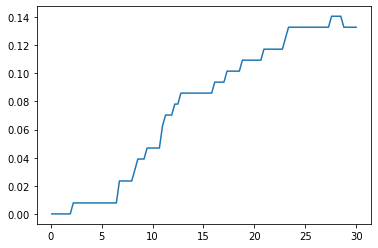

In [8]:
plt.plot(sigmas, err)
plt.show()

Does your classifier achieve 0% training error?

    Yes we achieve 0 error when sigma is close to zero

In [9]:
z = n // 8

mean_err = []

for sigma in sigmas:
    cross_err = []
    
    for i in range(8):
        test_idx = list(range(i * z, (i+1) * z))
        train_idx = np.setdiff1d(np.arange(n), test_idx)
        X_train, y_train = X[train_idx, :], y[train_idx, :]
        X_test, y_test = X[test_idx, :], y[test_idx, :]
    
        K = ComputeKernel(X_train, X_train ,sigma)
        alpha = ComputeAlpha(K, y_train)
       
        #K2 = ComputeKernel(X_train, X_test ,sigma)
        
        
        yhat = y_labels(X_train, X_test, alpha, sigma)
        
        err = np.mean(np.sign(yhat)!= y_test)
        
        cross_err.append(err)
        
        #print(y_test)
        
    mean_cross_err = np.mean(cross_err)
    mean_err.append(mean_cross_err)
        #cross_err.append(err)

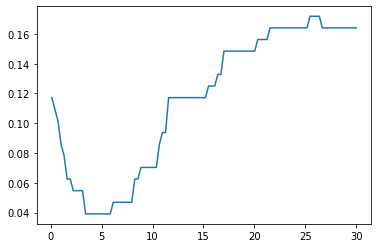

In [10]:
plt.plot(sigmas, mean_err)
plt.show()

# We never achieve perfect test accuracy